In [1]:
import pandas as pd
dataset=pd.read_csv("C:\data science\Churn_Modelling.csv")

In [2]:
dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1


In [3]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
dataset.shape

(10002, 14)

In [5]:
dataset.dropna(inplace=True,axis=0)
dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1


In [6]:
dataset.drop(columns=['Geography','Surname','Gender'],axis=1,inplace=True)

In [7]:
input_data=dataset.iloc[:,:-1]
output_data=dataset.iloc[:,-1]

In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [9]:
input_data.head(3)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.733261,-0.783315,-0.326298,0.293657,-1.041838,-1.225860,-0.911570,0.646028,0.970820,0.021720
1,-1.732914,-0.606606,-0.440137,0.198305,-1.387619,0.117428,-0.911570,-1.547921,0.970820,0.216366
2,-1.732568,-0.996022,-1.537125,0.293657,1.032846,1.333214,2.526981,0.646028,-1.030057,0.240519


In [10]:
import tensorflow

In [105]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import L2
from keras.callbacks import EarlyStopping

In [12]:
ann=Sequential()

In [13]:
ann.add(Dense(6,input_dim=10,activation='relu'))
ann.add(Dense(4,activation='relu'))
ann.add(Dense(2,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

C:\Users\jpjai\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [40]:
x_train.shape

(7998, 10)

In [80]:
ann.fit(x_train,y_train, batch_size=100, epochs=5)  #do epoch=50 for accuracy

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.8222 - loss: 0.4683
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.8221 - loss: 0.4659
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.8244 - loss: 0.4622
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8262 - loss: 0.4605
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8301 - loss: 0.4555


In [81]:
prd=ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step


In [82]:
prd

array([[0.19713789],
       [0.19713789],
       [0.19713789],
       ...,
       [0.34435013],
       [0.19713789],
       [0.19713789]], dtype=float32)

In [83]:
prd1=ann.predict(x_train)
prd_data1=[]
for i in prd1 :
    if i[0]>0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step


In [84]:
prd_data=[]
for i in prd :
    if i[0]>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [85]:
prd_data

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [86]:
from sklearn.metrics import accuracy_score


## Accuracy after changing random state

In [87]:
accuracy_score(y_test,prd_data)*100

81.39999999999999

In [88]:
accuracy_score(y_train,prd_data1)*100

82.54563640910227

In [89]:
y_test

4126    0
4069    0
1735    0
4744    1
6395    0
       ..
3803    1
8287    0
7855    0
1099    0
6931    0
Name: Exited, Length: 2000, dtype: int64

In [100]:
prd=ann.predict(x_test.iloc[:1,:])
prd_data=[]
for i in prd :
    if i[0]>0.5 :
        prd_data.append(1)
    else:
        prd_data.append(0)
prd_data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[0]

In [91]:
#predictions on any data:-

# prd=ann.predict(pd.DataFrame([[-0.303688,-0.364004,0.253243,-0.659863,1.724407,-1.225860,0.807705,0.646028,-1.030057,1.590140]]))
# prd_data=[]
# for i in prd :
#     if i[0]>0.5 :
#         prd_data.append(1)
#     else:
#         prd_data.append(0)
# prd_data

## EARLY STOPPAGE

In [92]:
import matplotlib.pyplot as plt
ann.fit(x_train,y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test),callbacks=EarlyStopping())  #do epoch=50 for accuracy

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8252 - loss: 0.4594 - val_accuracy: 0.8140 - val_loss: 0.4786
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8255 - loss: 0.4577 - val_accuracy: 0.8140 - val_loss: 0.4785
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8340 - loss: 0.4479 - val_accuracy: 0.8140 - val_loss: 0.4785
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8224 - loss: 0.4640 - val_accuracy: 0.8145 - val_loss: 0.4784
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8274 - loss: 0.4561 - val_accuracy: 0.8145 - val_loss: 0.4784


In [93]:
ann.history.history

{'accuracy': [0.8250812888145447,
  0.8253313302993774,
  0.8249562382698059,
  0.8253313302993774,
  0.8252062797546387],
 'loss': [0.46027427911758423,
  0.4599624276161194,
  0.45961853861808777,
  0.4592200219631195,
  0.45904478430747986],
 'val_accuracy': [0.8140000104904175,
  0.8140000104904175,
  0.8140000104904175,
  0.8144999742507935,
  0.8144999742507935],
 'val_loss': [0.4785531759262085,
  0.47852686047554016,
  0.47851815819740295,
  0.4784051179885864,
  0.4784356653690338]}

In [94]:
train_accuracy= ann.history.history['accuracy']
test_accuracy= ann.history.history['val_accuracy']

In [95]:
len(train_accuracy)    # same as no of epochs you used 

5

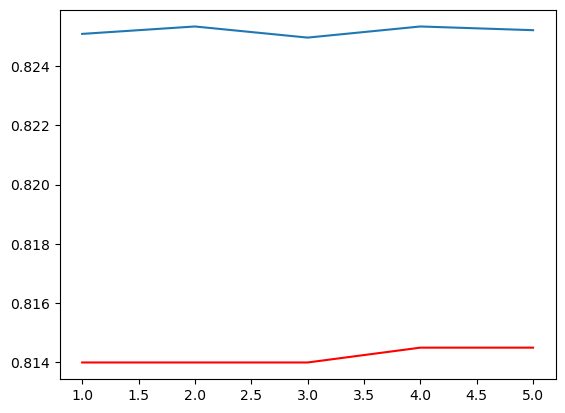

In [96]:
plt.plot([i for i in range(1,6)],train_accuracy)
plt.plot([i for i in range(1,6)],test_accuracy,c='red')
plt.show()

In [103]:
prd=ann.predict(x_test)
prd_data=[]
for i in prd :
    if i[0]>0.5 :
        prd_data.append(1)
    else:
        prd_data.append(0)
prd_data
accuracy_score(y_test,prd_data)*100

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step


81.45

In [104]:
accuracy_score(y_train,prd_data1)*100

82.49562390597649